In [1]:
# Make sure to import his module
import pandas as pd

## Warmup

In [2]:
# Warmup 1: What are your 2 favorite data structures that we have learned so far?
# personally, I really like dictionaries and lists.  They are very versatile and easy to work with.

In [3]:
# Warmup 2: Find the mean, median, and mode
#           of the following list of scores.
my_scores = [44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84]

mean = sum(my_scores)/len(my_scores)
median = sorted(my_scores)[len(my_scores)//2] if len(my_scores)%2==1 else sum(sorted(my_scores)[len(my_scores)//2-1:len(my_scores)//2+1])/2
mode = sorted({x:my_scores.count(x) for x in my_scores}.items(),key=lambda x:x[1],reverse=True)[0][0]

print("Mean:",mean,"\nmedian:",median,"\nmode:",mode)

Mean: 50.54545454545455 
median: 47 
mode: 23


# Pandas

## Reading

- Pandas Intro Notebook as [HTML](https://cs220.cs.wisc.edu/f24/materials/readings/pandas-intro.html) or [notebook](https://github.com/tylerharter/caraza-harter-com/tree/master/tyler/meena/cs220/s22/materials/readings)

## Learning Objectives
- Create a pandas Series from a list or from a dict
- Use Series methods max, min, mean, median, mode, quantile, value counts
- Extract elements from a Series using Boolean indexing
- Access Series members using .loc, .iloc, .items, and slicing
- Perform Series element-wise operations

### What is Pandas?
 - Pandas is a package of tools for doing Data Science
 - Pandas was installed with Anaconda, so its on your computers
 - [Learn More](https://en.wikipedia.org/wiki/Pandas_(software))

If for some reason, you don't have pandas installed, run the following command in terminal or powershell...
<pre>pip install pandas</pre>

### Series

The Pandas **Series** data type is like a **combination of a list and a dictionary**.

The terms we'll use when talking about Series are not very consistent with the terms we used for lists and dicts. It is good to learn the correct vocubalary, as you'll encounter the same vocabulary on websites like stackoverflow:

* A pandas *integer position* refers to a 0, 1, 2, etc. label, and is *equivalent to a list's index*.
* A pandas *index* refers to the programmer-chosen label (which could be a string, int, etc) on a value, and is *equivalent to a dict's key*.


## `Series` from a `dict`
A Series is a cross between a list and a dict, so we can make a series from a dict

In [4]:
d = {"one":7, "two": 8, "three": 9, "four":10, "five":11}
s = pd.Series(d)
print(type(s))
s

# IP  index    value
# 0   one      7
# 1   two      8
# 2   three    9
# 3   four     10
# 4   five     11
# dtype: int64

<class 'pandas.core.series.Series'>


one       7
two       8
three     9
four     10
five     11
dtype: int64

### Using `.loc[]` and `.iloc[]`
Use `.loc[???]` to look up items by index and `.iloc[???]` to look up items by integer position

In [5]:
print(s.loc["two"])
print(s.iloc[1])

8
8


### Slices also work

In [6]:
#slicing by the index -- NOTE: includes both ends of slice
print(s.loc["two":"four"])
print()
#slicing by the integer position -- NOTE: includes start but not stop
print(s.iloc[1:4])

two       8
three     9
four     10
dtype: int64

two       8
three     9
four     10
dtype: int64


In [7]:
# Negative integer positions works as well
s.iloc[-1]

11

### Permform operations on series by matching up their indices

In [8]:
## Series 1 from a dict
game1points = pd.Series({"Chris": 10, "Kiara": 3, "Mikayla": 7, "Ann": 8, "Trish": 6})
print(game1points)
print()
## Series 2 from a dict
game2points = pd.Series({"Kiara": 7, "Chris": 3,  "Trish": 11, "Mikayla": 2, "Ann": 5})
print(game2points)

Chris      10
Kiara       3
Mikayla     7
Ann         8
Trish       6
dtype: int64

Kiara       7
Chris       3
Trish      11
Mikayla     2
Ann         5
dtype: int64


In [9]:
# Now do math on the two series by matching up their indicies
total = game1points + game2points
total

Ann        13
Chris      13
Kiara      10
Mikayla     9
Trish      17
dtype: int64

In [10]:
# Who has the most points?
print(total.max())
print(total.idxmax())

17
Trish


In [11]:
# If you just use [] the index is used -- the same as .loc[]
total['Kiara']

10

### Multi-indexing

In [12]:
# We can have multi-indexing....slightly different from slicing
print(total[["Chris", "Trish"]])
print()
# also works with iloc on the integer position
print(total.iloc[[2,4]])

Chris    13
Trish    17
dtype: int64

Kiara    10
Trish    17
dtype: int64


### Sorting by value and by index

In [13]:
total_sorted = total.sort_values(ascending=False)
total_sorted

Trish      17
Ann        13
Chris      13
Kiara      10
Mikayla     9
dtype: int64

In [14]:
total_sorted2 = total.sort_index()
total_sorted2

Ann        13
Chris      13
Kiara      10
Mikayla     9
Trish      17
dtype: int64

In [15]:
ax = total_sorted.plot.bar(color="green", fontsize=16)
ax.set_ylabel("total points", fontsize=16)

Text(0, 0.5, 'total points')

## `Series` from a `list`

In [16]:
scores = pd.Series([44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84])
print(type(scores))
print(scores)

# IP  index    value
# 0   0        44
# 1   1        32
# 2   2        19
# 3   3        67
# 4   4        23
# 5   5        23
# 6   6        92
# 7   7        47
# 8   8        47
# 9   9        78
# 10  10       84
# dtype: int64

<class 'pandas.core.series.Series'>
0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64


Remember that using [] directly access the index (same as .loc[]) and .iloc[] access the integer position.
You can use slicing and multi-indexing

In [17]:
print(scores[3])
print()
print(scores[3:6])
print()
print(scores[[3,6]])

67

3    67
4    23
5    23
dtype: int64

3    67
6    92
dtype: int64


In [18]:
## Series calculations
## mean, median, mode, quartiles, sd, count
print(scores.mean())
print(scores.median())
print(scores.std())

50.54545454545455
47.0
26.051347897426098


In [19]:
# There could be multiple modes, so mode returns a Series
print(scores.mode())

0    23
1    47
dtype: int64


In [20]:
# 5-Number summary
print(scores.quantile([1.0, 0.75, 0.5, 0.25, 0]))

1.00    92.0
0.75    72.5
0.50    47.0
0.25    27.5
0.00    19.0
dtype: float64


In [21]:
print(scores.quantile([0.9, 0.1]))

0.9    84.0
0.1    23.0
dtype: float64


`value_counts` creates a series where the index is the data, and the value is its count in the series

In [22]:
ages = pd.Series([18, 19, 20, 20, 20, 17, 18, 24, 25, 35, 22, 20, 21, 21, 20, 23, 23, 19, 19, 19, 20, 21])
ages.value_counts()

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
Name: count, dtype: int64

A series can be sorted by index or by values

### Plotting

[Text(0.5, 0, 'age'), Text(0, 0.5, 'count')]

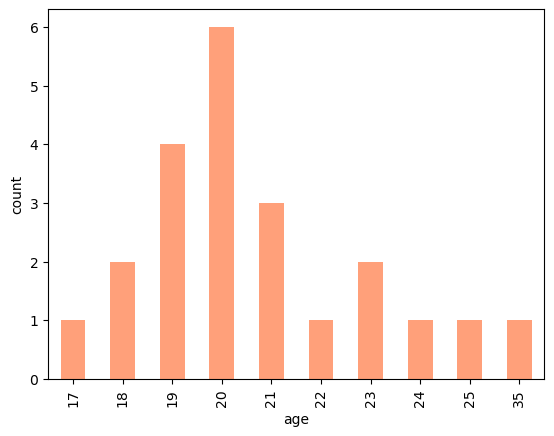

In [23]:
## Series bar chart
age_plot = ages.value_counts().sort_index().plot.bar(color='lightsalmon')
age_plot.set(xlabel = "age", ylabel = "count")

# Boolean Indexing and Filtering

By doing operations on a Series, you can create another Series.  A Boolean Series can be used as a filter.

In [24]:
print(scores)
print()
print(scores+5)
print()
print(scores > 40)


0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64

0     49
1     37
2     24
3     72
4     28
5     28
6     97
7     52
8     52
9     83
10    89
dtype: int64

0      True
1     False
2     False
3      True
4     False
5     False
6      True
7      True
8      True
9      True
10     True
dtype: bool


In [25]:
scores[scores>40]

0     44
3     67
6     92
7     47
8     47
9     78
10    84
dtype: int64

If you want to filter on multiple conditions, you need to use the following symbols in your boolean expression:

 - & means 'and'
 - | means 'or'
 - ~ means 'not'
 - we must use () for compound boolean expressions

In [26]:
scores[(scores>60) | (scores<20)]

2     19
3     67
6     92
9     78
10    84
dtype: int64

In [27]:
scores[(scores>20) & (scores<60)]

0    44
1    32
4    23
5    23
7    47
8    47
dtype: int64

In [28]:

print(ages)
print()
# TODO: What ages are in the range 18 to 20, inclusive?
ages[ (ages>=18) & (ages<=20)]

0     18
1     19
2     20
3     20
4     20
5     17
6     18
7     24
8     25
9     35
10    22
11    20
12    21
13    21
14    20
15    23
16    23
17    19
18    19
19    19
20    20
21    21
dtype: int64



0     18
1     19
2     20
3     20
4     20
6     18
11    20
14    20
17    19
18    19
19    19
20    20
dtype: int64

In [29]:
# TODO: What percentage of students are in this age range?
len(ages[(ages>=18)&(ages<=20)])/len(ages)

0.5454545454545454

In [30]:
# TODO: What percentage of students are ages 18 OR 21?
len(ages[(ages==18) | (ages==21)]) / len(ages)

0.22727272727272727

In [31]:
# TODO: what percentage of students are NOT 19? 
len(ages[~(ages==19)]) / len(ages)

0.8181818181818182

In [32]:
# Modified from https://automatetheboringstuff.com/chapter14/
import csv
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

data = process_csv("pokemon_stats.csv")
header = data[0]
print(len(data))
data = data[1:]
print(header)
print(data[15:18])

886
['', 'Name', 'Attack', 'Defense', 'HP', 'Region', 'Sp. Atk', 'Sp. Def', 'Speed', 'Type 1', 'Type 2']
[['15', 'Pidgey', '45', '40', '40', 'Kanto', '35', '35', '56', 'Normal', 'Flying'], ['16', 'Pidgeotto', '60', '55', '63', 'Kanto', '50', '50', '71', 'Normal', 'Flying'], ['17', 'Pidgeot', '80', '75', '83', 'Kanto', '70', '70', '101', 'Normal', 'Flying']]


## More things to know about Series
Next time, We'll talk about `DataFrame`, which is a series of series (like a spreadsheet!)

Feel overwhelmed? Do the required reading & worksheet. Pandas operations are good to put on your notesheet.

In [33]:
game1points

Chris      10
Kiara       3
Mikayla     7
Ann         8
Trish       6
dtype: int64

In [34]:
game1points.iloc[2] # looks up by integer position

7

In [35]:
game1points.loc["Mikayla"] # looks up by pandas index

7

In [36]:
my_new_series = pd.Series({1: 89, 2: 104, 3: 681}) # this can be tricky!
my_new_series

1     89
2    104
3    681
dtype: int64

In [37]:
my_new_series.iloc[1] # by integer position

104

In [38]:
my_new_series.loc[1] # by index

89

In [39]:
my_new_series[1] # by index!

89

In [40]:
my_new_series[my_new_series > 100] # ... and also boolean masking!

2    104
3    681
dtype: int64

In [41]:
# TODO: Create a Series of all the Pokemon names.
pokemon_list = [row[1] for row in data]
pokemons = pd.Series(pokemon_list)
pokemons

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
880     Regieleki
881     Regidrago
882     Glastrier
883     Spectrier
884       Calyrex
Length: 885, dtype: object

In [42]:
# TODO: Create a Series of all the Pokemon HPs.
hp_list = [int(row[4]) for row in data]
hps = pd.Series(hp_list)
hps

0       45
1       60
2       80
3       39
4       58
      ... 
880     80
881    200
882    100
883    100
884    100
Length: 885, dtype: int64

In [43]:
# TODO: Find the most common HP
hps.mode()

0    60
dtype: int64

In [44]:
# TODO: Find how many pokemon have that most common hp
len(hps[hps==hps.mode()[0]])

74

In [45]:
# TODO: How many Pokemon have HP between 50 and 75 (inclusive)? 
len(hps[(hps >= 50) & (hps <= 75)])

427

In [46]:
# TODO: What are the names of weak pokemon (<30 HP)?
weak_hps_idx = hps[hps < 30].index
pokemons[weak_hps_idx]

47       Diglett
60          Abra
78     Magnemite
124     Magikarp
167        Pichu
208      Shuckle
275        Ralts
287     Shedinja
344       Feebas
350      Duskull
760       Wimpod
812      Blipbug
871       Dreepy
dtype: object

In [47]:
# TODO: What are the names of the pokemon from strongest to weakest (using health)?
all_hps_desc = hps.sort_values(ascending=False)
pokemons[all_hps_desc.index]

237      Blissey
109      Chansey
787     Guzzlord
881    Regidrago
197    Wobbuffet
         ...    
350      Duskull
124     Magikarp
208      Shuckle
47       Diglett
287     Shedinja
Length: 885, dtype: object

Feel overwhelmed? Do the required reading. Pandas operations are good to put on your notesheet.